Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

read the file

In [2]:

df=pd.DataFrame()

df = pd.read_excel('D:/Neural_Network/exo_08022019/heart_disease_for_curves.xls',header=0)


print(df.head())

  sample  cholesteral  thalac  oldpeak   disease
0  train          261     141        3  positive
1  train          263     105        2  negative
2  train          269     121        2  negative
3  train          177     140        4  negative
4  train          256     142        6  positive


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cholesteral,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
thalac,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
oldpeak,270.0,10.500000,11.452098,0.0,0.0,8.0,16.0,62.0


transform the disease column into a new label with  1 for positive and 0 for negative

In [4]:
df = pd.get_dummies(df, columns=['disease'], drop_first=True)
df.rename(columns={'disease_positive':'label'}, inplace=True)
df.head()

,sample,cholesteral,thalac,oldpeak,label
0,train,261,141,3,1
1,train,263,105,2,0
2,train,269,121,2,0
3,train,177,140,4,0
4,train,256,142,6,1


create the training samples for the model

In [5]:
X=df.drop(['sample','label'],axis=1)[0:150]

y_train=df['label'][0:150]

X.head()


,cholesteral,thalac,oldpeak
0,261,141,3
1,263,105,2
2,269,121,2
3,177,140,4
4,256,142,6


Data processing: 
the Multi-layer Perceptron is sensitive to feature scaling.  I will use the built-in StandardScaler for standardization.I apply the same scaling for the training set X and the test set X .    


In [6]:
scaler = StandardScaler()

# Fit only to the training data X:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data X:
X_train = scaler.transform(X)
X_train.shape

(150, 3)

train the model with the training set X_train and y_train, 
I choose 3 layers with the same number of neurons 30,
I choose the activation 'tanh':hyperbolic tan function and the solver 'adam':refers to a stochastic gradient-based optimizer, the alpha is 1e-8,
With these parameters for the data, the model converge easily to the minimum without too much overfitting thanks to alpha not too low.

In [7]:

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),activation='tanh',solver='adam', alpha=1e-8)

mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Evaluate the model with predictions:
I apply the same StandardScaler on the X_test to standardization the data to predict.

In [8]:
#define the data for predictions:
X_test=df.drop(['sample','label'],axis=1)[150:270]

#define the data to compar with the predictions:
y_test=df['label'][150:270]

#apply the StandardScaler transformations to the data X_test:
X_test = scaler.transform(X_test)

#pred the data with the model:
predictions = mlp.predict(X_test)
predictions

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=uint8)

I use SciKit-Learn’s built in metrics with a classification report, accuracy score and confusion matrix to evaluate how well the model performed.

In [9]:
print(classification_report(y_test,predictions))

print('The score is {}'.format(accuracy_score(y_test,predictions, normalize=True)))

             precision    recall  f1-score   support

          0       0.76      0.77      0.77        66
          1       0.72      0.70      0.71        54

avg / total       0.74      0.74      0.74       120

The score is 0.7416666666666667


I have a score around 74%, the model predict well  the data of the X_test.

below, you have the confusion matrix with the true positive and the others.

In [10]:
confusion=confusion_matrix(y_test,predictions)
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

print(confusion)
print("##############################")
print('True Positive is {}'.format(tp))
print('True Negative is {}'.format(tn))
print('False Positive is {}'.format(fp))
print('False Negative is {}'.format(fn))


[[51 15]
 [16 38]]
##############################
True Positive is 38
True Negative is 51
False Positive is 15
False Negative is 16


In [11]:
#poids des neuronnes:
print(mlp.coefs_)
#poid du premier nerone:
print(len(mlp.coefs_[0]))
#biais du modele
print(mlp.intercepts_)



[array([[ 0.41010298, -0.00856761, -0.34708295,  0.43358223,  0.00594617,
         0.1437066 , -0.15834563, -0.11606696,  0.22591564, -0.06293057,
        -0.04324826, -0.25159966, -0.40004319, -0.08016502,  0.12472068,
        -0.16798137, -0.22185916,  0.2181663 , -0.33052246,  0.3748268 ,
         0.1743623 ,  0.21484961,  0.37182407,  0.25362374,  0.22445301,
         0.3550522 , -0.07801522, -0.10761062,  0.09654425,  0.19018051],
       [ 0.37268859,  0.40646642, -0.35310687,  0.19411847,  0.25516947,
         0.03697317, -0.26681602,  0.26265362, -0.1959916 ,  0.296385  ,
        -0.20577551, -0.33189136, -0.22684596,  0.24565833, -0.16380108,
        -0.26719974,  0.11149893, -0.0607341 , -0.40250084,  0.06498722,
        -0.3899793 ,  0.22422896,  0.02548779,  0.03497812,  0.0018838 ,
        -0.44658296,  0.14395186,  0.08065384,  0.04026447,  0.34272265],
       [ 0.39160293,  0.36230536,  0.29722018,  0.25168686, -0.1060646 ,
        -0.20235348,  0.00633629, -0.04402748, -

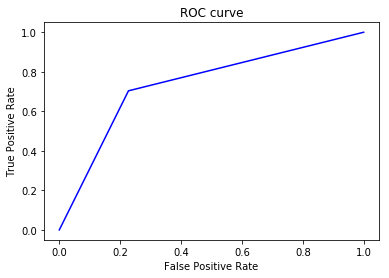

In [12]:

y_pred =mlp.predict(X_test)
false_prediction, true_prediction, threshold = roc_curve(y_test, y_pred)

plt.plot(false_prediction,true_prediction, color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()